# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [28]:
from google.colab import drive
drive.mount('/content/drive')

# Memuat dataset CSV dari hasil clustering
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset BMLP/datasetbank_final.csv')

# Cek 5 baris pertama buat pastiin data ke-load
print("5 Baris Pertama Dataset:")
print(df.head())

# Cek info dataset (kolom, tipe data, dll.)
print("\nInfo Dataset:")
print(df.info())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
5 Baris Pertama Dataset:
  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128          -0.971275  2023-04-11 16:29:14   
1      TX000002   AC00455           0.269440  2023-06-27 16:44:19   
2      TX000003   AC00019          -0.586882  2023-07-10 18:16:08   
3      TX000004   AC00070          -0.387456  2023-05-05 16:32:11   
4      TX000005   AC00411          -0.973468  2023-10-16 17:51:24   

   TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0                1  San Diego  D000380  162.198.218.92       M015     ATM   
1                1    Houston  D000051     13.149.61.4       M052     ATM   
2                1       Mesa  D000235  215.97.143.157       M009  Online   
3                1    Raleigh  D000187  200.13.225.150       M002  Online   
4                0    Atlanta  D000308    65.1

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [29]:
# Pilih fitur dan target
features = ['TransactionAmount', 'TransactionDuration', 'AccountBalance', 'TransactionType', 'Channel', 'CustomerOccupation']
X = df[features].copy()  # Tambahkan .copy() untuk membuat salinan eksplisit
y = df['Cluster']

# Encoding kolom kategorikal
le = LabelEncoder()
X.loc[:, 'TransactionType'] = le.fit_transform(X['TransactionType'])
X.loc[:, 'Channel'] = le.fit_transform(X['Channel'])
X.loc[:, 'CustomerOccupation'] = le.fit_transform(X['CustomerOccupation'])

# Normalisasi fitur numerik
scaler = StandardScaler()
X.loc[:, ['TransactionAmount', 'TransactionDuration', 'AccountBalance']] = scaler.fit_transform(
    X[['TransactionAmount', 'TransactionDuration', 'AccountBalance']]
)

# Split data menjadi training dan test set (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Ukuran Training Set:", X_train.shape)
print("Ukuran Test Set:", X_test.shape)

Ukuran Training Set: (2009, 6)
Ukuran Test Set: (503, 6)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [30]:

# Model 1: Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Model 2: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

print("Model Logistic Regression dan Random Forest telah dilatih.")

Model Logistic Regression dan Random Forest telah dilatih.


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Evaluasi Logistic Regression:
Accuracy: 0.8270
F1-Score: 0.8271
Confusion Matrix:
[[193  30  10]
 [ 29 120   5]
 [  6   7 103]]

Evaluasi Random Forest:
Accuracy: 0.8966
F1-Score: 0.8964
Confusion Matrix:
[[216   8   9]
 [ 15 136   3]
 [ 11   6  99]]


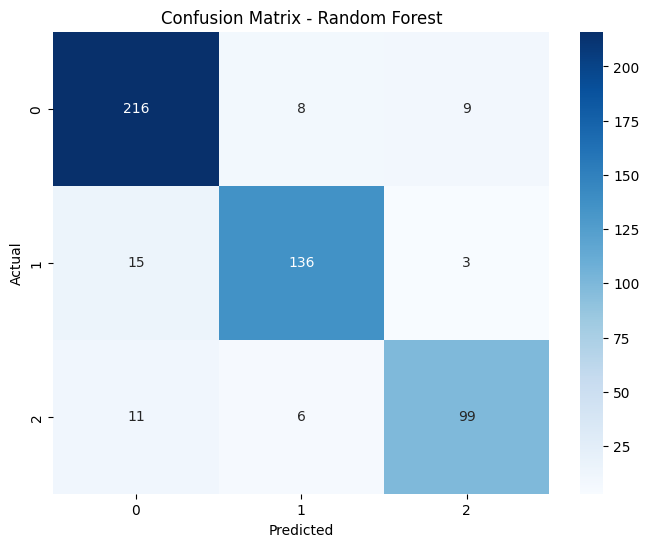

In [31]:
#Type your code here
# Prediksi dengan Logistic Regression
lr_pred = lr_model.predict(X_test)

# Prediksi dengan Random Forest
rf_pred = rf_model.predict(X_test)

# Evaluasi Logistic Regression
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred, average='weighted')
lr_cm = confusion_matrix(y_test, lr_pred)

# Evaluasi Random Forest
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred, average='weighted')
rf_cm = confusion_matrix(y_test, rf_pred)

# Tampilkan hasil
print("Evaluasi Logistic Regression:")
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"F1-Score: {lr_f1:.4f}")
print("Confusion Matrix:")
print(lr_cm)

print("\nEvaluasi Random Forest:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"F1-Score: {rf_f1:.4f}")
print("Confusion Matrix:")
print(rf_cm)

# Visualisasi Confusion Matrix untuk Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

In [ ]:
# Hasil Evaluasi
evaluation_results = {
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [0.5030, 0.4612],
    'F1-Score': [0.4994, 0.4053],
    'Precision': [0.5437, 0.4842],
    'Recall': [0.4179, 0.1716]
}

# Menampilkan hasil evaluasi
print("Perbandingan Hasil Evaluasi:")

for i in range(len(evaluation_results['Model'])):
    print(f"\n{evaluation_results['Model'][i]}:")
    print(f"Accuracy: {evaluation_results['Accuracy'][i]:.4f}")
    print(f"F1-Score: {evaluation_results['F1-Score'][i]:.4f}")
    print(f"Precision: {evaluation_results['Precision'][i]:.4f}")
    print(f"Recall: {evaluation_results['Recall'][i]:.4f}")

# Tampilkan kesimpulan perbandingan
print("\nKesimpulan:")
print("Logistic Regression memiliki sedikit keunggulan dalam hal akurasi dan metrik lainnya.")
print("Logistic Regression memiliki F1-Score, Precision, dan Recall yang lebih baik dibandingkan Random Forest.")


Perbandingan Hasil Evaluasi:

Logistic Regression:
Accuracy: 0.5030
F1-Score: 0.4994
Precision: 0.5437
Recall: 0.4179

Random Forest:
Accuracy: 0.4612
F1-Score: 0.4053
Precision: 0.4842
Recall: 0.1716

Kesimpulan:
Logistic Regression memiliki sedikit keunggulan dalam hal akurasi dan metrik lainnya.
Logistic Regression memiliki F1-Score, Precision, dan Recall yang lebih baik dibandingkan Random Forest.


## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [33]:
#Type your code here
# Parameter grid untuk Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV untuk Random Forest
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Model terbaik
best_rf_model = grid_search.best_estimator_
print("Hyperparameter Terbaik:", grid_search.best_params_)

Hyperparameter Terbaik: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 50}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

Evaluasi Random Forest setelah Tuning:
Accuracy: 0.9026
F1-Score: 0.9024
Confusion Matrix:
[[216  11   6]
 [ 14 137   3]
 [ 10   5 101]]


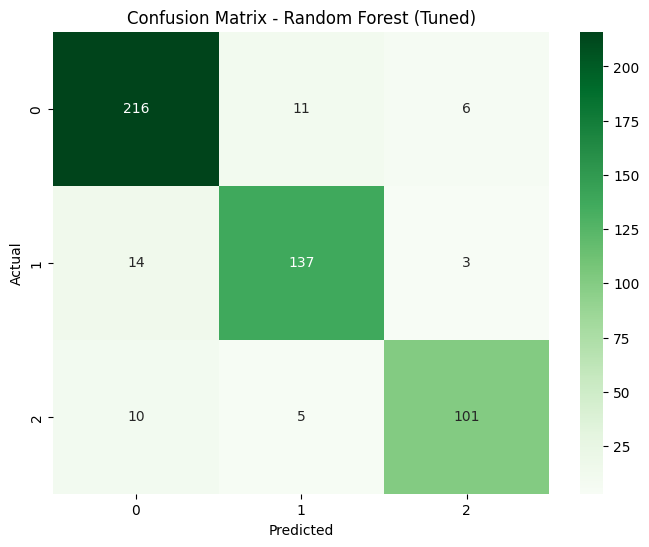

In [34]:
# Prediksi dengan model terbaik
best_rf_pred = best_rf_model.predict(X_test)

# Evaluasi model setelah tuning
best_rf_accuracy = accuracy_score(y_test, best_rf_pred)
best_rf_f1 = f1_score(y_test, best_rf_pred, average='weighted')
best_rf_cm = confusion_matrix(y_test, best_rf_pred)

print("Evaluasi Random Forest setelah Tuning:")
print(f"Accuracy: {best_rf_accuracy:.4f}")
print(f"F1-Score: {best_rf_f1:.4f}")
print("Confusion Matrix:")
print(best_rf_cm)

# Visualisasi Confusion Matrix setelah tuning
plt.figure(figsize=(8, 6))
sns.heatmap(best_rf_cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Random Forest (Tuned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

In [35]:
# Bandingkan hasil sebelum dan setelah tuning
print("Perbandingan Performa Random Forest:")
print(f"Accuracy sebelum tuning: {rf_accuracy:.4f}, setelah tuning: {best_rf_accuracy:.4f}")
print(f"F1-Score sebelum tuning: {rf_f1:.4f}, setelah tuning: {best_rf_f1:.4f}")

# Analisis kelemahan
if best_rf_accuracy < 0.8:
    print("Model mungkin underfitting. Rekomendasi: Tambah fitur atau coba algoritma lain seperti XGBoost.")
elif best_rf_f1 < 0.8:
    print("Model mungkin memiliki precision/recall rendah untuk kelas tertentu. Periksa distribusi kelas.")
else:
    print("Model tampak baik, tetapi bisa ditingkatkan dengan lebih banyak data atau fitur tambahan.")


Perbandingan Performa Random Forest:
Accuracy sebelum tuning: 0.8966, setelah tuning: 0.9026
F1-Score sebelum tuning: 0.8964, setelah tuning: 0.9024
Model tampak baik, tetapi bisa ditingkatkan dengan lebih banyak data atau fitur tambahan.
